In [1]:
import os
import logging
import datetime
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = 500

## Read the train.csv file

In [3]:
df = pd.read_csv("/Users/kaitaidong/Downloads/train.csv")

In [4]:
df.shape

(200000, 202)

In [5]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

## Check the percentage of missing values in each column

In [6]:
def show_missing_data(df):
    """
    Present the total number of missing values for each column and corresponding percentage.
    """
    total = df.isnull().sum()
    percent = (df.isnull().sum() / df.isnull().count() * 100)
    tt = pd.concat([total, percent], axis=1, keys=['Total Number of missing observations', 'Percent'])
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    tt['data_types'] = types
    return tt

In [7]:
show_missing_data(df).head(10)

,Total Number of missing observations,Percent,data_types
ID_code,0,0.0,object
target,0,0.0,int64
var_0,0,0.0,float64
var_1,0,0.0,float64
var_2,0,0.0,float64
var_3,0,0.0,float64
var_4,0,0.0,float64
var_5,0,0.0,float64
var_6,0,0.0,float64
var_7,0,0.0,float64


#### Take away: 

After evaluating the percentage of missing values to the total number of values in each column, it turns out that there is no missing values in this case

## Check the numerical values in the dataset

In [8]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

#### Take away:

1. standard deviation seems to be large for the variable data
2. mean values are distributed over a large range for all variables

## Check the distribution of the target values

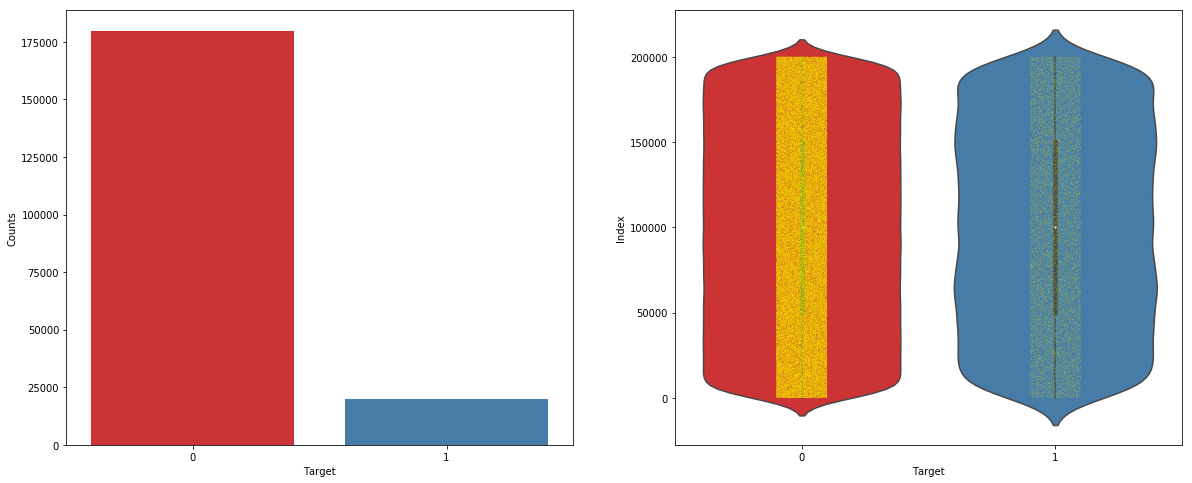

In [9]:
fig, ax = plt.subplots(1,2,figsize=(20,8))

sns.countplot(df.target.values, ax=ax[0], palette="Set1")
sns.violinplot(x=df.target.values, y=df.index.values, ax=ax[1], palette="Set1")
sns.stripplot(x=df.target.values, y=df.index.values,
              jitter=True, ax=ax[1], color="yellow", size=0.5, alpha=0.5)

ax[1].set_xlabel("Target")
ax[1].set_ylabel("Index");
ax[0].set_xlabel("Target")
ax[0].set_ylabel("Counts");

In [10]:
print("There are {}% target values with 1".format(100 * df["target"].value_counts()[1]/df.shape[0]))

There are 10.049% target values with 1


#### Take away:

There are 10.049% target values with 1, and it is unbalanced with respect to target values

## Density plots of the features

We represent with different colors the distribution for values with target value 0 and 1

In [11]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    """
    Plot feature distributions.
    """
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

Here shows the density plots for first 100 feature values

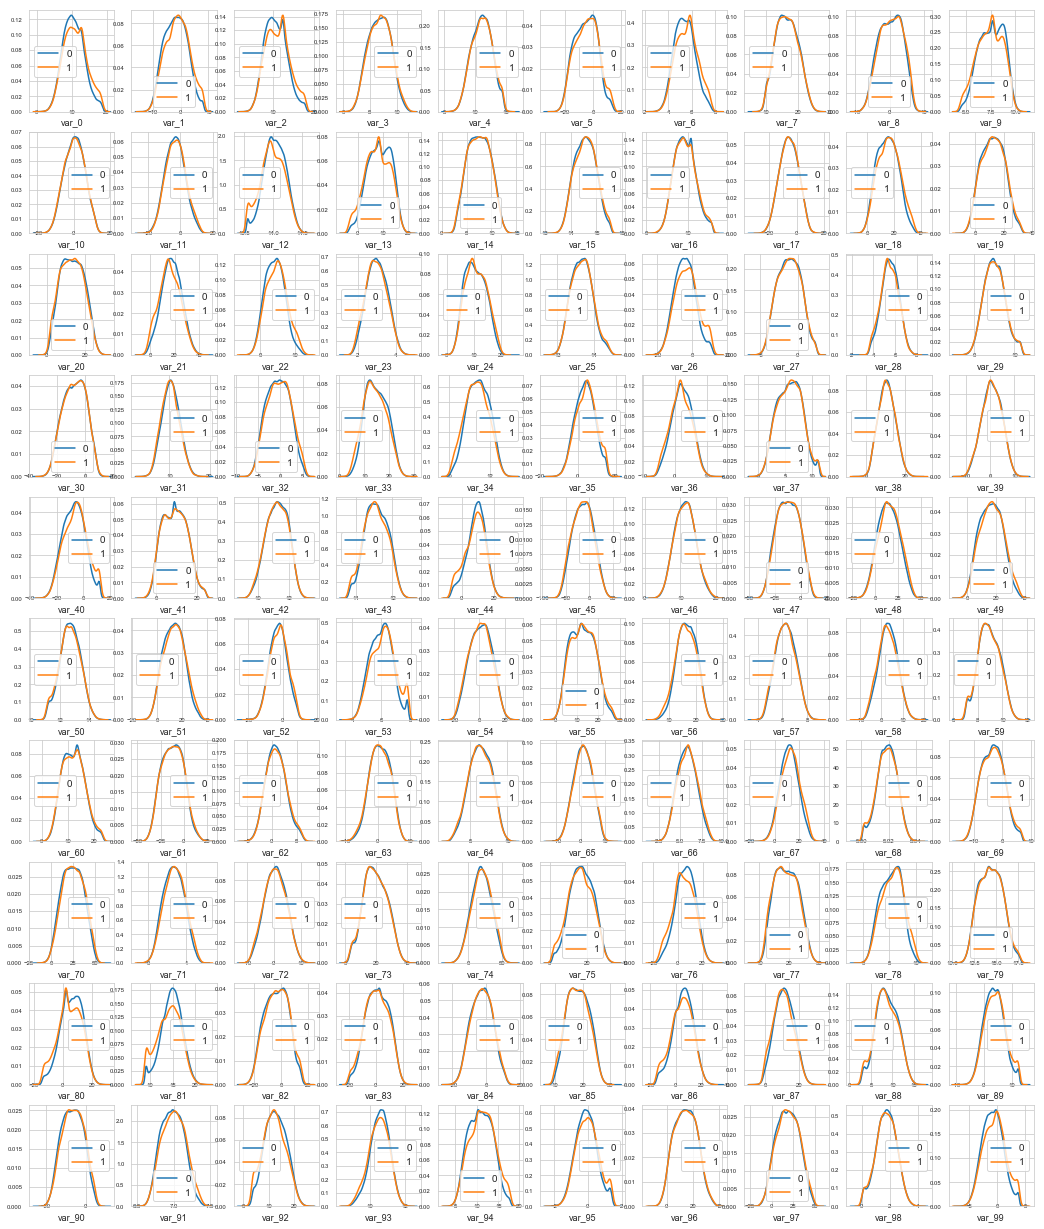

In [12]:
t0 = df.loc[df['target'] == 0]
t1 = df.loc[df['target'] == 1]
features = df.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

#### Take away:

We can observe that there is a considerable number of features with significant different distribution for the two target values.

## Distribution of std and mean

In [13]:
def plot_distribution_for_metrics(df, features, func, labels: list, titles: list,
                                  figsize=(20, 5), kde=True, bins=120, norm_hist=True):
    """
    
    """
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    sns.distplot(df[features].apply(func, axis=1), ax=ax[0], color="red", 
                 kde=kde, bins=bins, norm_hist=norm_hist, label=labels[0])
    sns.distplot(df[features].apply(func, axis=0), ax=ax[1], color="blue", 
                 kde=kde, bins=bins, norm_hist=norm_hist, label=labels[1])
    
    ax[0].set_title(titles[0])
    ax[1].set_title(titles[1])

    ax[0].legend()
    ax[1].legend()
    plt.show()

In [14]:
# select features to use
features = df.columns.values[2:202]
labels = ['train_row', 'train_column']

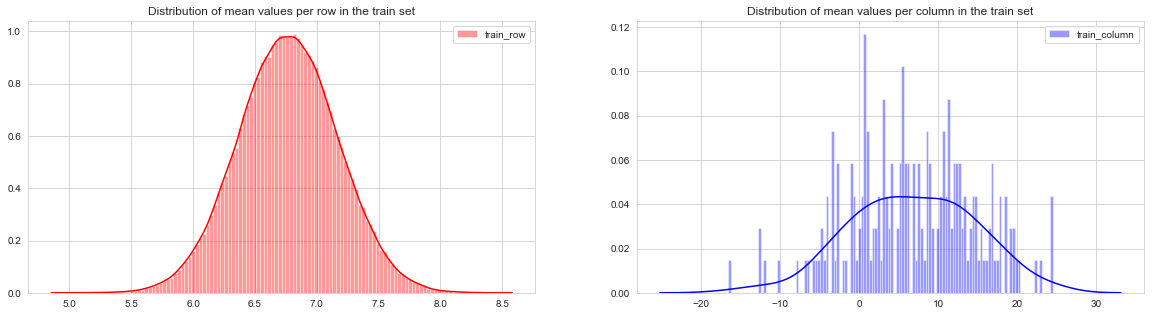

In [15]:
# plot the distribution of mean values per row and per column
titles = ["Distribution of mean values per row in the train set",
         "Distribution of mean values per column in the train set"]

plot_distribution_for_metrics(df, features, 'mean', labels=labels, titles=titles)

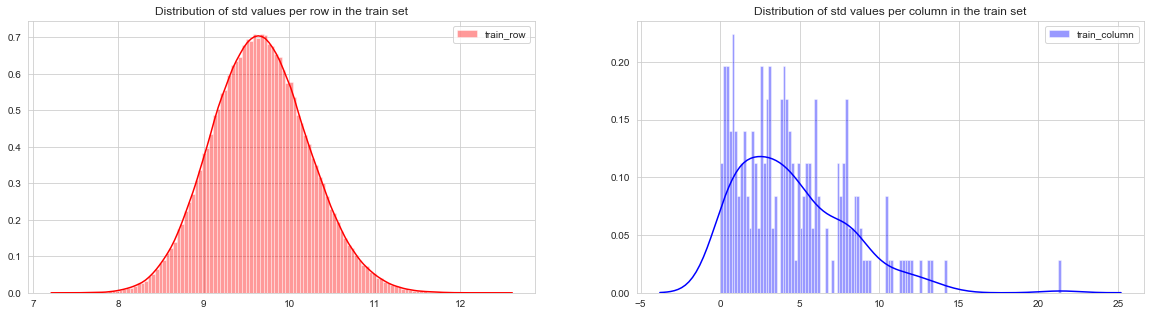

In [16]:
titles = ["Distribution of std values per row in the train set",
         "Distribution of std values per column in the train set"]

plot_distribution_for_metrics(df, features, 'std', labels=labels, titles=titles)

In [17]:
def plot_comparison_distribution(df1, df2, func, labels: list, titles: list,
                                 figsize=(20, 5), kde=True, bins=120, norm_hist=True):
    
    fig, ax = plt.subplots(1,2,figsize=figsize)

    sns.distplot(df1[features].apply(func, axis=1), ax=ax[0], color="red", 
                 kde=kde, bins=bins, norm_hist=norm_hist, label=labels[0])
    sns.distplot(df1[features].apply(func, axis=0), ax=ax[1], color="red", 
                 kde=kde, bins=bins, norm_hist=norm_hist, label=labels[1])
    sns.distplot(df2[features].apply(func, axis=1), ax=ax[0], color="blue", 
                 kde=kde, bins=bins, norm_hist=norm_hist, label=labels[0])
    sns.distplot(df2[features].apply(func, axis=0), ax=ax[1], color="blue", 
                 kde=kde, bins=bins, norm_hist=norm_hist, label=labels[1])
    
    ax[0].set_title(titles[0])
    ax[1].set_title(titles[1])

    ax[0].legend()
    ax[1].legend()
    plt.show()

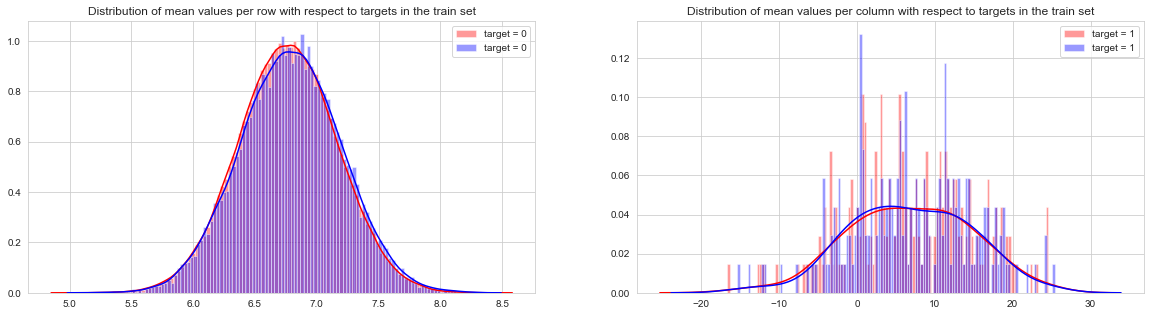

In [71]:
t0 = df.loc[df['target'] == 0]
t1 = df.loc[df['target'] == 1]

labels = ['target = 0', 'target = 1']
titles = ["Distribution of mean values per row with respect to targets in the train set",
         "Distribution of mean values per column with respect to targets in the train set"]
plot_comparison_distribution(t0, t1, 'mean', labels=labels, titles=titles)

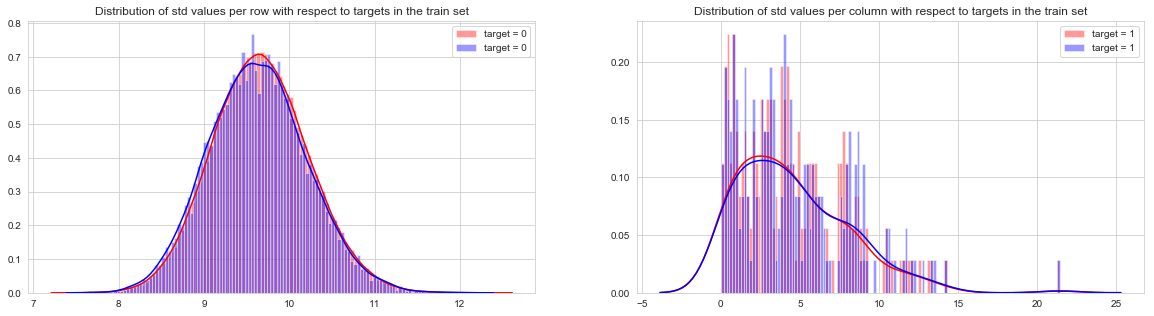

In [72]:
titles = ["Distribution of std values per row with respect to targets in the train set",
         "Distribution of std values per column with respect to targets in the train set"]
plot_comparison_distribution(t0, t1, 'std', labels=labels, titles=titles)

## Distribution of skew and Kurtosis

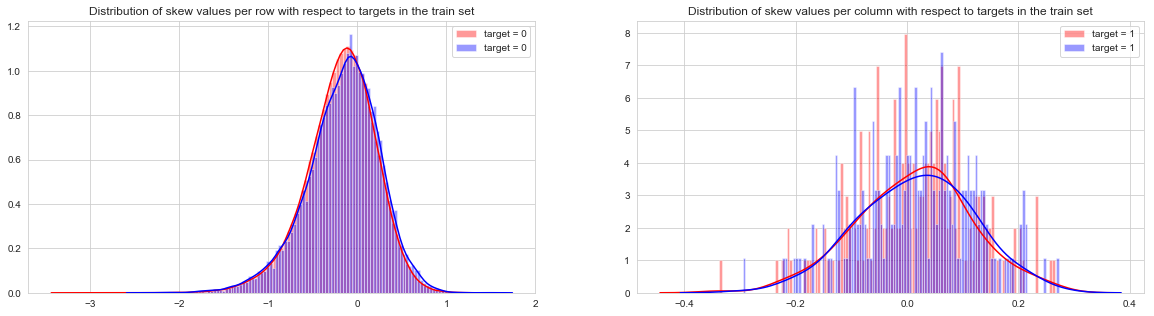

In [73]:
titles = ["Distribution of skew values per row with respect to targets in the train set",
         "Distribution of skew values per column with respect to targets in the train set"]
plot_comparison_distribution(t0, t1, 'skew', labels=labels, titles=titles)

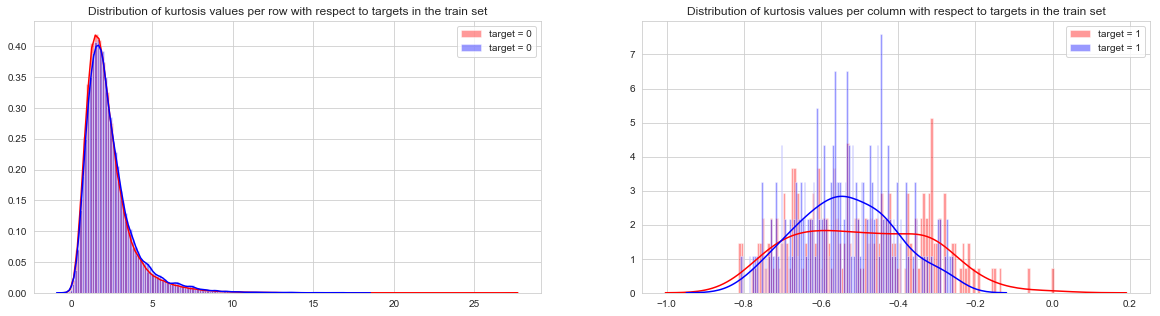

In [74]:
titles = ["Distribution of kurtosis values per row with respect to targets in the train set",
         "Distribution of kurtosis values per column with respect to targets in the train set"]
plot_comparison_distribution(t0, t1, 'kurtosis', labels=labels, titles=titles)

In [ ]:
train_df = df.drop(["ID_code", "target"], axis=1)
target = df['target']

## Principal Component Analysis

Apply PCA to check the dimensionality reduction condition

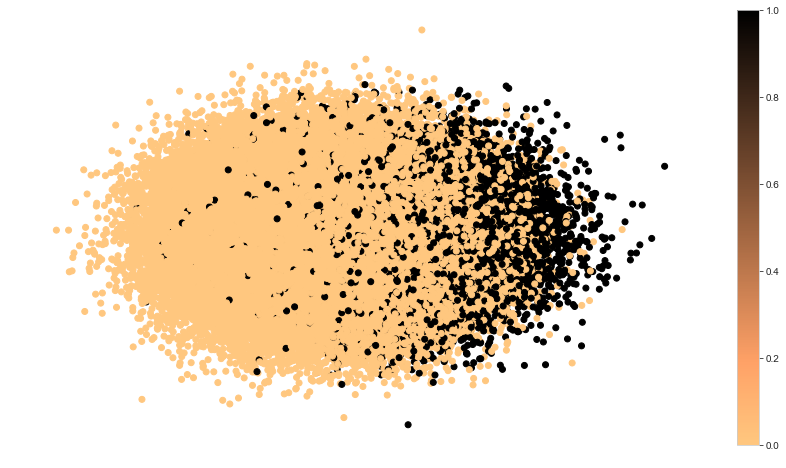

In [22]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df)         
PCA_train_x = PCA(2).fit_transform(train_scaled)

plt.figure(figsize=(15, 8))
plt.scatter(PCA_train_x[:, 0], PCA_train_x[:, 1], c=target, cmap="copper_r")
plt.axis('off')
plt.colorbar()
plt.show()

It shows that PCA isn't quite useful in giving much information, therefore I decide to proceed with existing dataset

## Feature correlation

In [61]:
%%time
correlations = df[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]

CPU times: user 11.1 s, sys: 184 ms, total: 11.3 s
Wall time: 11.3 s


In [37]:
correlations = (
    train_df[features]
        .corr()
        .unstack()
        .to_frame('correlation')
        .reset_index()
        .sort_values('correlation')
)
correlations = correlations.query("level_0 != level_1")

In [38]:
correlations.tail(10)

,level_0,level_1,correlation
24532,var_122,var_132,0.008956
26522,var_132,var_122,0.008956
29369,var_146,var_169,0.009071
33946,var_169,var_146,0.009071
37983,var_189,var_183,0.009359
36789,var_183,var_189,0.009359
34881,var_174,var_81,0.009490
16374,var_81,var_174,0.009490
33081,var_165,var_81,0.009714
16365,var_81,var_165,0.009714


In [39]:
correlations.head(10)

,level_0,level_1,correlation
5339,var_26,var_139,-0.009844
27826,var_139,var_26,-0.009844
29653,var_148,var_53,-0.009788
10748,var_53,var_148,-0.009788
16006,var_80,var_6,-0.008958
1280,var_6,var_80,-0.008958
280,var_1,var_80,-0.008855
16001,var_80,var_1,-0.008855
2602,var_13,var_2,-0.008795
413,var_2,var_13,-0.008795


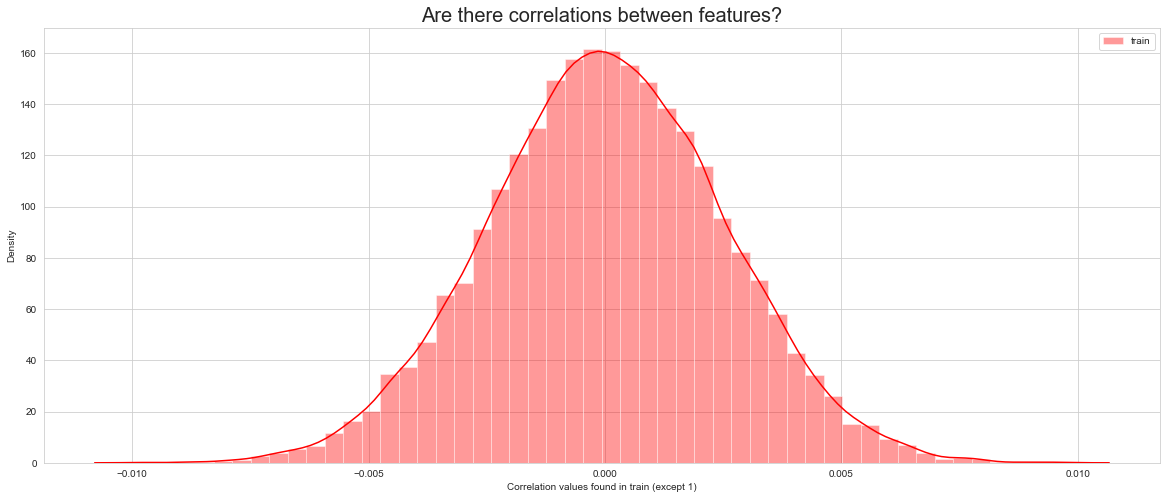

In [75]:
plt.figure(figsize=(20,8))
sns.distplot(correlations['correlation'], color="Red", label="train")
plt.xlabel("Correlation values found in train (except 1)")
plt.ylabel("Density")
plt.title("Are there correlations between features?", fontsize=20); 
plt.legend();

No handles with labels found to put in legend.


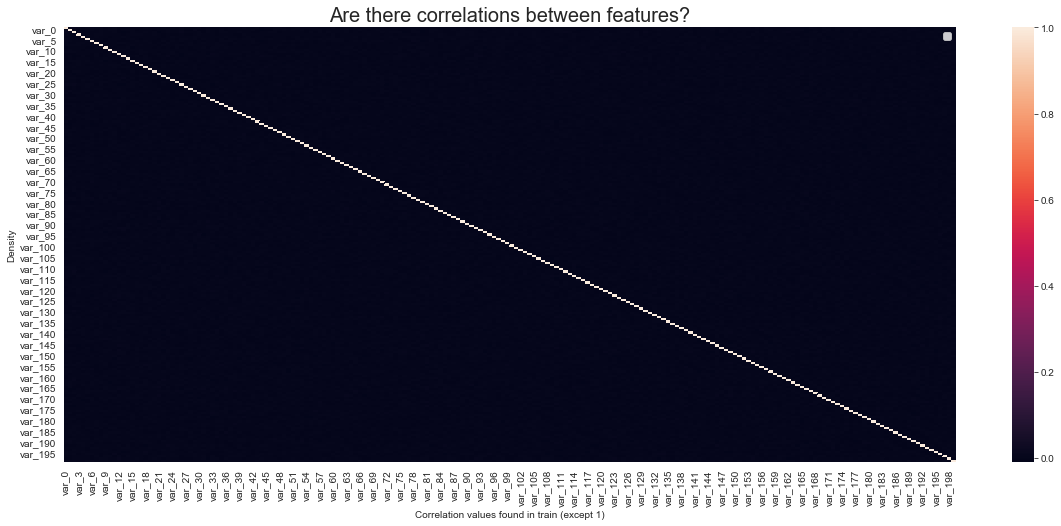

In [76]:
plt.figure(figsize=(20,8))
sns.heatmap(train_df[features].corr(), color="Red")
plt.xlabel("Correlation values found in train (except 1)")
plt.ylabel("Density")
plt.title("Are there correlations between features?", fontsize=20); 
plt.legend();

#### Take away:

All features seem to have no linear correlation!!! Neither in train nor in test. Very strange. We know that they are anonymized and perhaps they are decorrelated by some transformation as well.

## Random Forrest to select top features

To start easy, let's use a random forest to select top 10 features. They can serve as a starting point to discover their nature and for trying to understand the data. In addition they may yield some ideas on how to generate new features. 

To start simple I like to use a random forest that helps us to select important features. As there are no linear correlations it's a good idea to start with a nonlinear model that allows us to discover features, their importances as well as interactions

In [47]:
parameters = {'min_samples_leaf': [20, 25]}
forest = RandomForestClassifier(max_depth=15, n_estimators=15)
grid = GridSearchCV(forest, parameters, cv=3, n_jobs=-1, verbose=2, scoring=make_scorer(roc_auc_score))

In [48]:
grid.fit(train_df.values, target.values)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] min_samples_leaf=20 .............................................
[CV] min_samples_leaf=20 .............................................
[CV] min_samples_leaf=20 .............................................
[CV] min_samples_leaf=25 .............................................
[CV] .............................. min_samples_leaf=20, total=  55.5s
[CV] .............................. min_samples_leaf=20, total=  55.9s
[CV] min_samples_leaf=25 .............................................
[CV] .............................. min_samples_leaf=25, total=  54.4s
[CV] min_samples_leaf=25 .............................................
[CV] .............................. min_samples_leaf=20, total=  55.2s


[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   57.9s remaining:   57.9s


[CV] .............................. min_samples_leaf=25, total=  34.6s
[CV] .............................. min_samples_leaf=25, total=  34.8s


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': [20, 25]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=2)

In [50]:
grid.best_score_

0.5000248761194029

In [51]:
grid.best_params_

{'min_samples_leaf': 20}

In [52]:
n_top = 10

In [53]:
importances = grid.best_estimator_.feature_importances_

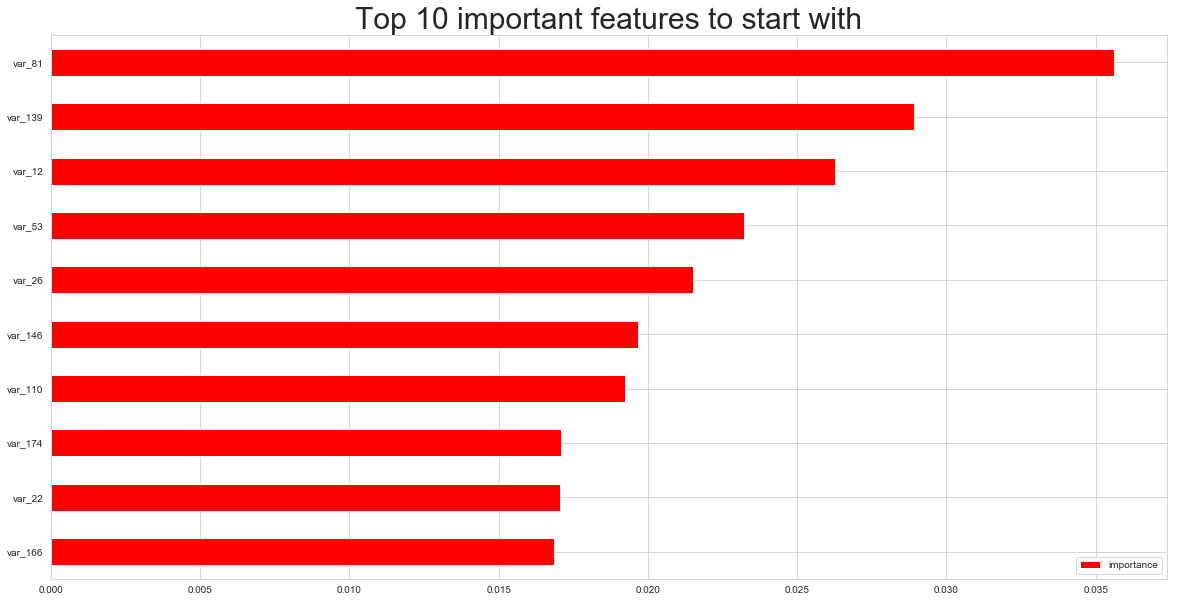

In [64]:
fig, ax = plt.subplots(figsize=(20, 10))

df_feature_importance = pd.DataFrame(importances, index = train_df.columns, columns=['importance'])\
    .sort_values('importance',ascending=False)
    
df_feature_importance[: n_top][::-1].plot(kind='barh', color="r", align="center", ax=ax)

plt.title("Top {} important features to start with".format(str(n_top)), fontsize=30);

## Pairplot of the top 5 features

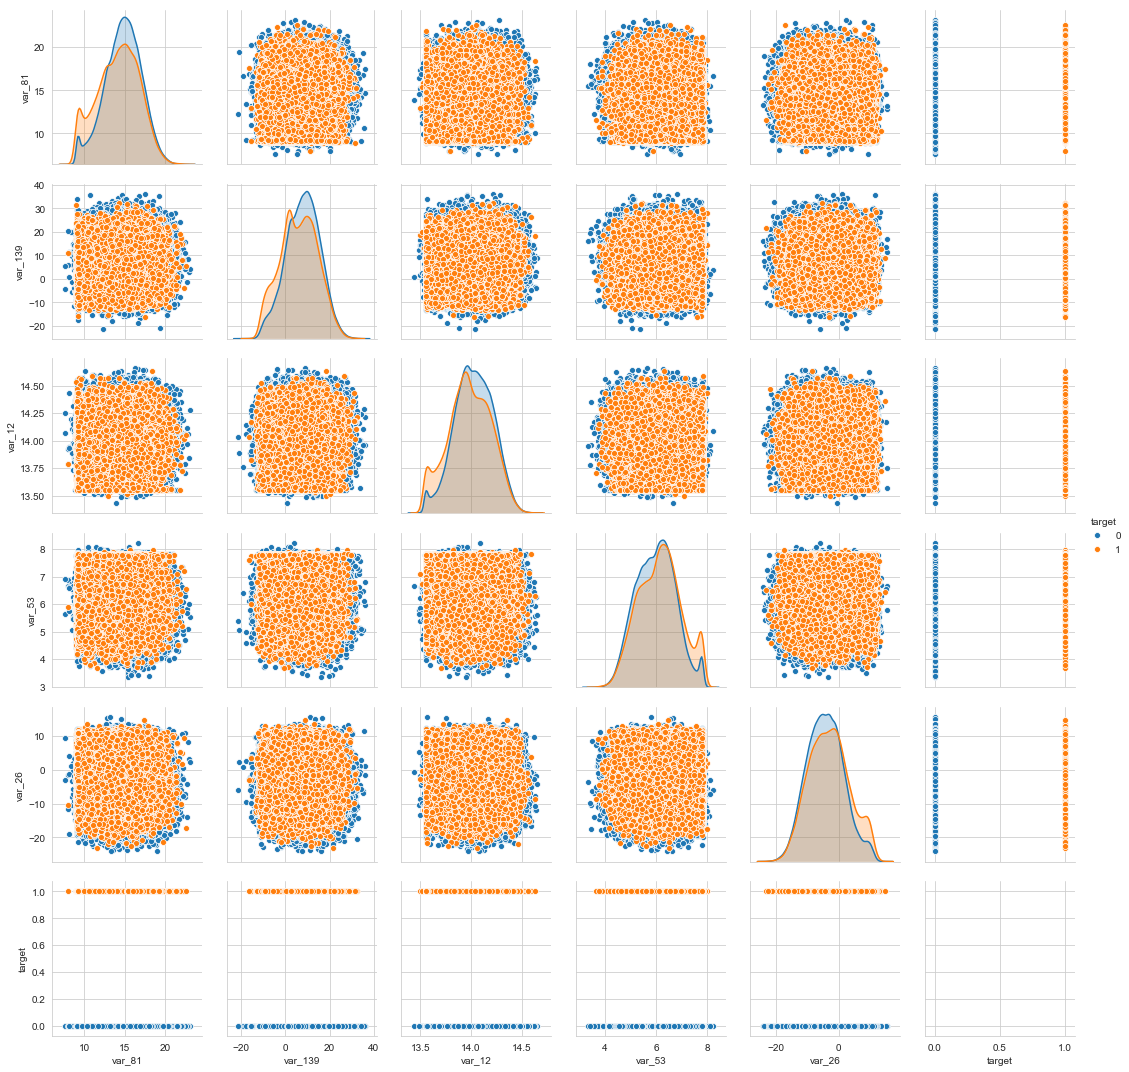

In [70]:
n_top = 5
top = df.loc[:, df_feature_importance.index[: n_top]].join(target)
sns.pairplot(top, hue="target")